# Programming Assignment: 1NN против RandomForest

В этом задании будет использоваться датасет digits из sklearn.datasets. Оставьте последние 25% объектов для контроля качества, разделив X и y на X_train, y_train и X_test, y_test.

Целью задания является реализовать самый простой метрический классификатор — метод ближайшего соседа, а также сравнить качество работы реализованного вами 1NN с RandomForestClassifier из sklearn на 1000 деревьях.

In [1]:
from sklearn import model_selection, datasets, neighbors, ensemble
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from sklearn.metrics import accuracy_score

In [2]:
def plot_number_by_index(ind):
    img_data = X[ind]
    label = y[ind]
    plt.figure(1, figsize=(3, 3))
    plt.imshow(img_data.reshape((8,8)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"label is {label}")
    plt.show()

def write_answer_1(score):
    with open("answer1.txt", "w") as file_obj:
        file_obj.write(str(score))
def write_answer_2(score):
    with open("answer2.txt", "w") as file_obj:
        file_obj.write(str(score))

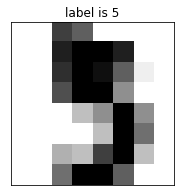

In [3]:
ds = datasets.load_digits()
X = ds.data
y = ds.target
X_tr, X_ts, y_tr, y_ts = model_selection.train_test_split(X, y, test_size=0.25)
plot_number_by_index(5)

__Задание 1__

Реализуйте самостоятельно метод одного ближайшего соседа с евклидовой метрикой для задачи классификации. Можно не извлекать корень из суммы квадратов отклонений, т.к. корень — монотонное преобразование и не влияет на результат работы алгоритма.

Никакой дополнительной работы с признаками в этом задании делать не нужно — мы еще успеем этим заняться в других курсах. Ваша реализация может быть устроена следующим образом: можно для каждого классифицируемого объекта составлять список пар (расстояние до точки из обучающей выборки, метка класса в этой точке), затем сортировать этот список (по умолчанию сортировка будет сначала по первому элементу пары, затем по второму), а затем брать первый элемент (с наименьшим расстоянием).

Никакой дополнительной работы с признаками в этом задании делать не нужно — мы еще успеем этим заняться в других курсах. Ваша реализация может быть устроена следующим образом: можно для каждого классифицируемого объекта составлять список пар (расстояние до точки из обучающей выборки, метка класса в этой точке), затем сортировать этот список (по умолчанию сортировка будет сначала по первому элементу пары, затем по второму), а затем брать первый элемент (с наименьшим расстоянием).

Релизация 1NN "вручную"

In [4]:
pr = []
for x in X_ts:
    distances = (euclidean(x, example) for example in X_tr)
    ng = sorted(((dist, target) for (dist, target) in zip(distances, y_tr)), key=lambda x: x[0])
    neighbors_targets = [target for (_, target) in ng[:1]]
    pr.append(neighbors_targets)
er = 1 - accuracy_score(pr, y_ts)
print('Scorrer (kNN-manual):', er)

Scorrer (kNN-manual): 0.020000000000000018


Релизация автоматического 1NN 

In [5]:
cl_er = neighbors.KNeighborsClassifier(n_neighbors=1, weights='uniform', algorithm='auto')
cl_er.fit(X_tr, y_tr)
er = 1 - accuracy_score(cl_er.predict(X_ts), y_ts)
print('Scorrer (kNN-auto):', er)
write_answer_1(er)

Scorrer (kNN-auto): 0.020000000000000018


Реализация RandomForest

In [6]:
cl_er = ensemble.RandomForestClassifier(random_state=0, n_estimators=1000)
cl_er.fit(X_tr, y_tr)
er = 1 - accuracy_score(cl_er.predict(X_ts), y_ts)
print('Error R-forest:', er)
write_answer_2(er)

Error R-forest: 0.03555555555555556
